# Chose 4 different regression techniques

## Read data
Only one file awailable, test dataset will be a part of the main dataset:
`data/diamonds/diamonds.csv`

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [80]:
diamonds = pd.read_csv('data/diamonds/diamonds.csv')
diamonds.drop('Unnamed: 0', axis=1, inplace=True)

### Check data
`info()` method shows if there are missing values
it shows that there aren't any missing values (non-null for every feature)

In [15]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Preprocessing (without scaling)
Preprocessing is needed because data contains ordinal features. We have now two possibilities to encode them:
- one Hot encoding: every unique value gets its own feature
- label encoding: every value gets a number assigned (implies that the features have ratio-scale)

### Label encoding

In [69]:
cuts = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
colors = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarities = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
diamonds['cut'] = diamonds['cut'].apply(lambda x: cuts.index(x))
diamonds['color'] = diamonds['color'].apply(lambda x: colors.index(x))
diamonds['clarity'] = diamonds['clarity'].apply(lambda x: clarities.index(x))

### One Hot encoding

In [81]:
for key in diamonds.keys():
    if diamonds[key].dtype == 'object':
        uniques = diamonds[key].unique()
        for unique in uniques:
            diamonds[key + '_' + unique] = diamonds[key].apply(lambda x: 1 if x == unique else 0)
        diamonds.drop(key, axis=1, inplace=True)

In [82]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
carat            53940 non-null float64
depth            53940 non-null float64
table            53940 non-null float64
price            53940 non-null int64
x                53940 non-null float64
y                53940 non-null float64
z                53940 non-null float64
cut_Ideal        53940 non-null int64
cut_Premium      53940 non-null int64
cut_Good         53940 non-null int64
cut_Very Good    53940 non-null int64
cut_Fair         53940 non-null int64
color_E          53940 non-null int64
color_I          53940 non-null int64
color_J          53940 non-null int64
color_H          53940 non-null int64
color_F          53940 non-null int64
color_G          53940 non-null int64
color_D          53940 non-null int64
clarity_SI2      53940 non-null int64
clarity_SI1      53940 non-null int64
clarity_VS1      53940 non-null int64
clarity_VS2      53940 non-null int64
clari

## Feature Pearson Correlation

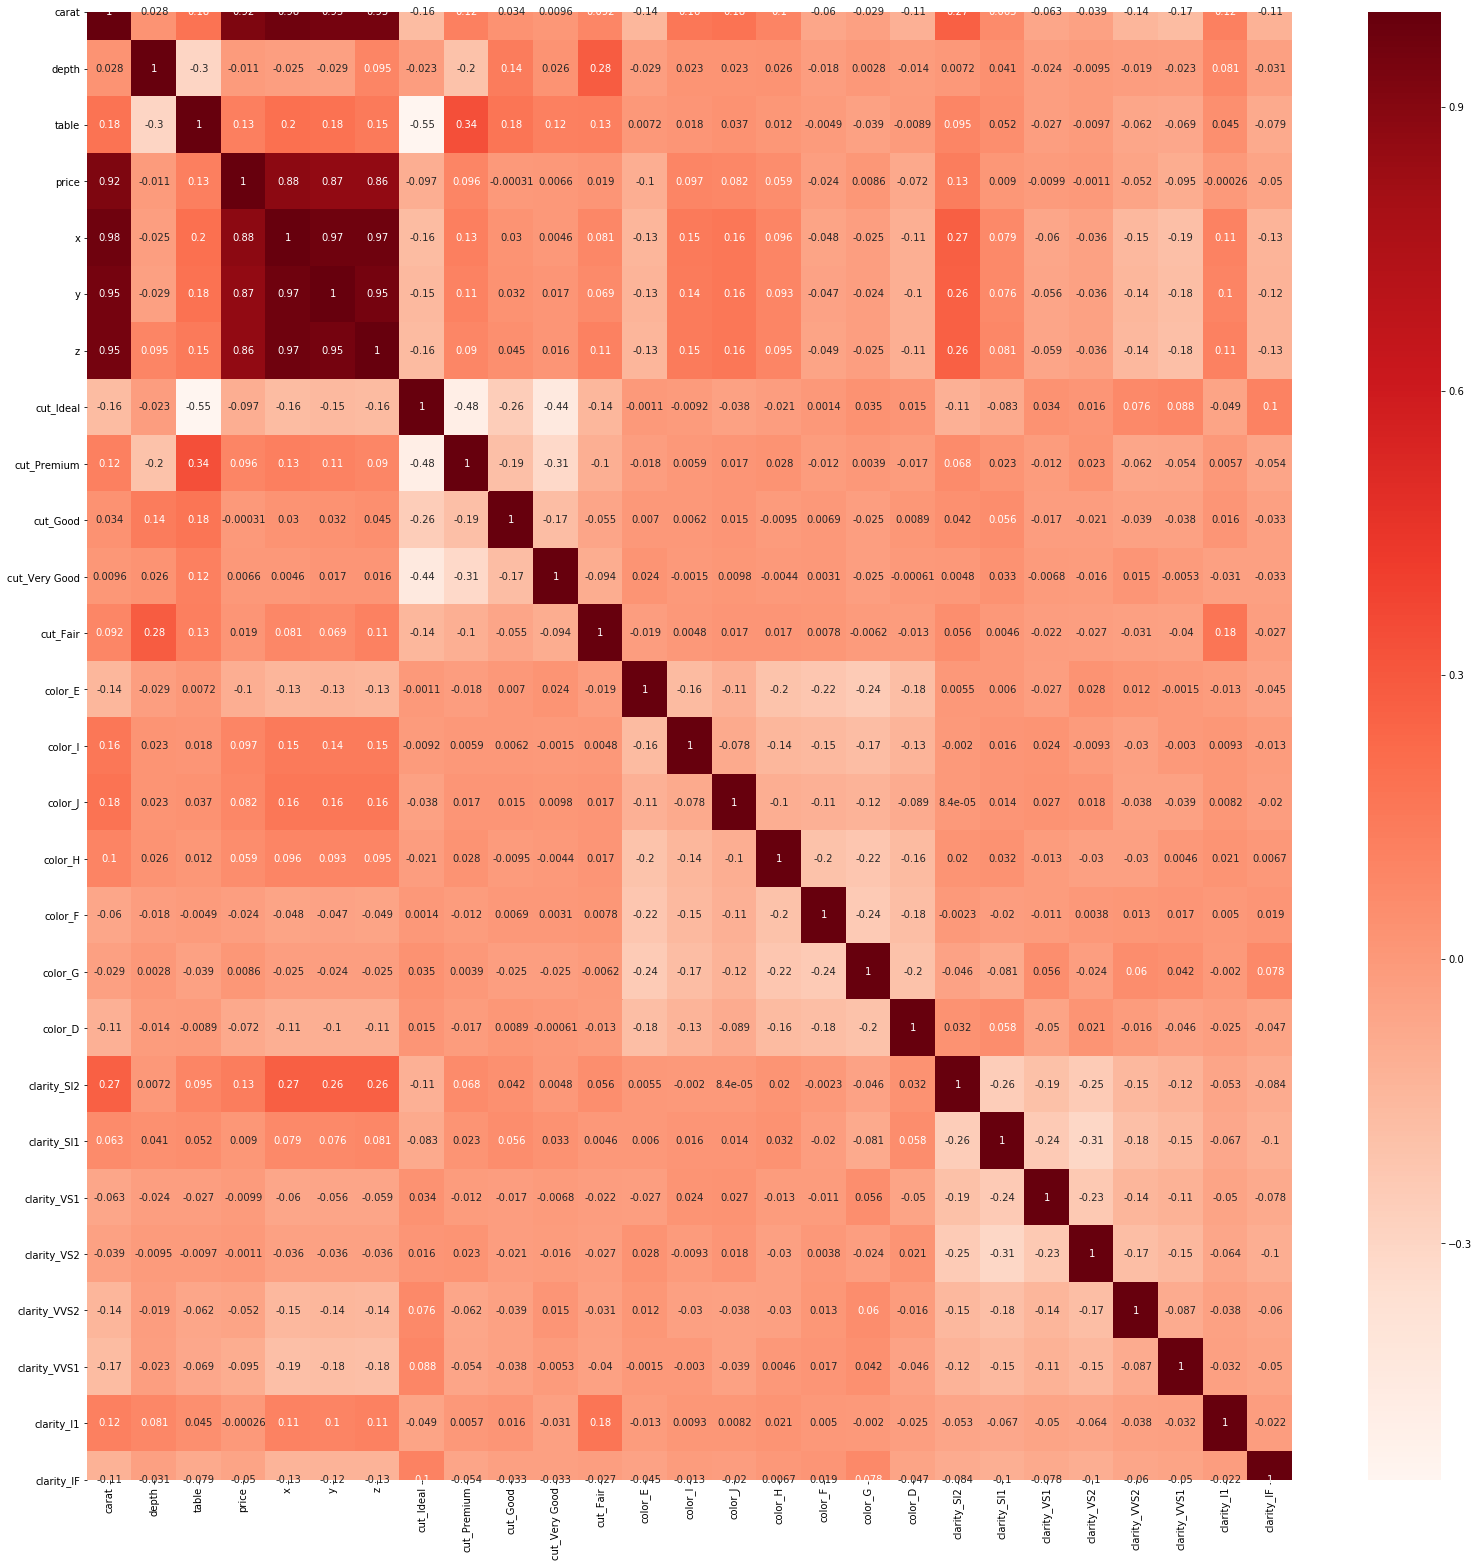

In [85]:
plt.figure(figsize=(27,27))
cor = diamonds.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('diamonds_feature_correlation.png')
plt.show()

## Creating feature and target arrays

In [86]:
#diamonds_dropped = diamonds.drop(['x'], axis = 1)
diamonds_dropped = diamonds

In [87]:
X = diamonds_dropped.drop('price', axis = 1).values
y = diamonds_dropped['price'].values

## Creating train and test data 


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

## Starting with a simple model to:
+ get a sense of how challenging the problem is
+ many more things might go wrong with complex models
+ how much signal can we pull out using basic models

## Ridge regression
__Score history:__
- Test set RMSE of rf: 1201.245 (base version, label encoding)
- Test set RMSE of rf: 1125.839 (one hot encoding, changed train/test from 70/30 to 50/50)

### Ridge parameters
- __alpha:__
    - regularization strenght: the higher the value, the stronger the regularization
- __fit_intercept:__
    - weather to calculate an intercept for this model (e. g. not needed if centered) 
- __normalize:__
    - if `fit_intercept` and `normalize` are both `True` the regressor X will be normalized

In [89]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [90]:
# create parameter list for ridge regression
params_ridge = {
    'alpha':[x/100. for x in range(0,500,10)],
    'normalize': [True, False],
    'fit_intercept': [True, False]
}

ridge = Ridge()

In [91]:
# setup cross validation parameter grid search
grid_ridge = GridSearchCV(estimator=ridge,
    param_grid=params_ridge,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)

In [92]:
# fitting model on training data
grid_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.17611e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34215e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.17611e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34215e-22): result may not be accurate.
  overwrite_a=True).T
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    8.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
                                   1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
                                   2.7, 2.8, 2.9, ...],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [93]:
# extracting best parameters (can be used for finer hyper parameter tuning)
grid_ridge.best_params_

{'alpha': 1.8, 'fit_intercept': True, 'normalize': False}

In [94]:
# predicting values and calculating the rmse-score
y_pred_ridge = grid_ridge.predict(X_test)
rmse_test_ridge = MSE(y_test, y_pred_ridge)**(1/2)
print('Test set RMSE of rf: {:.3f}'.format(rmse_test_ridge))

Test set RMSE of rf: 1125.839


## Lasso regression
__Score history:__
- Test set RMSE of rf: 1201.65 (base version, label encoding)
- Test set RMSE of rf: 1125.88 (one hot encoding, changed train/test from 70/30 to 50/50)

### Lasso Parameters:
- __alpha:__
    - constant that multiplies the L1-Norm
- __fit_intercept:__
    - weather to calculate an intercept for this model (e. g. not needed if centered) 
- __normalize:__
    - if `fit_intercept` and `normalize` are both `True` the regressor X will be normalized
- __positive:__
    - when `True` forces the coefficients to be positive

In [95]:
from sklearn.linear_model import Lasso

In [96]:
params_lasso = {
    'alpha': [0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2],
    'normalize': [True, False],
    'fit_intercept': [True, False],
    'positive': [True, False] 
}

lasso = Lasso()

In [97]:
grid_lasso = GridSearchCV(estimator=lasso,
    param_grid=params_lasso,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)

In [98]:
grid_lasso.fit(X_train, y_train)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123352631.40834045, tolerance: 28863038.319628146
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138277218.668602, tolerance: 28795263.693363525
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126018333.90291595, tolerance: 28785274.68717159
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converg

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11788199887.24545, tolerance: 56863355.0893
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11282882392.24497, tolerance: 57058902.8087
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11891938899.231615, tolerance: 56803483.6142
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11834755379.062138, toleran

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12225962369.51718, tolerance: 56803483.6142
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12187241627.360022, tolerance: 56863355.0893
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11633135341.372583, tolerance: 57058902.8087
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12225962369.51718, toleran

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1, 1.1, 1.2],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [99]:
grid_lasso.best_params_

{'alpha': 0.005, 'fit_intercept': True, 'normalize': True, 'positive': False}

In [100]:
y_pred_lasso = grid_lasso.predict(X_test)
rmse_test_lasso = MSE(y_test, y_pred_lasso)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_lasso))

Test set RMSE of rf: 1125.88


## Random Forest
__Score history:__
- Test set RMSE of rf: 536.55 (base version, label encoding)
- Test set RMSE of rf: 568.82 (one hot encoding, changed train/test from 70/30 to 50/50)

### Random Forest parameters
- __n_estimators:__
    - number of trees in the forest
- __max_depth:__
    - maximum depth of the tree
- __min_samples_split:__
    - the min. number of samples required to split an internal node
- __min_samples_leaf:__
    - the minimum number of samples required to be at a leaf node
- __min_weight_fraction_leaf:__
    - the minimum weighted fraction of the sum total of weights
- __max_features:__
    - the number of features to consider when looking for the best split
- __min_impurity_decrease:__
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rf = RandomForestRegressor(random_state=42)

In [103]:
# take a look at the rf's parameters
print(rf.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [104]:
params_rf = {
    'n_estimators': [100],
    'max_depth': [None, 20, 21, 22],
    'min_samples_split': [2, 3, 4]
}

grid_rf = GridSearchCV(estimator=rf,
    param_grid=params_rf,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)

In [105]:
grid_rf.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  8.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [None, 20, 21, 22],
  

In [106]:
grid_rf.best_params_

{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 100}

In [107]:
y_pred = grid_rf.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


Test set RMSE of rf: 568.82


## Creating SVM
__Score history:__
- Test set RMSE of rf: 

### SVM parameters
- __c:__
    - penalty parameeter (higher => overfitting)
- __shrinking:__
    - weather to use the shrinking heuristic
- __kernel:__
    - specifies the kernel type

In [61]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [62]:
scaler = RobustScaler()
svr = SVR()

In [63]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [64]:
pipe = make_pipeline(scaler, svr)

In [65]:
params_svr = {'svr__C': [1.0, 1.1, 1.2, 1.3, 1.4],
 'svr__kernel': ['rbf', 'linear', 'poly', 'rbf', 'sigmoid'],
 'svr__shrinking': [True, False]}

grid_svr = GridSearchCV(estimator=pipe,
    param_grid=params_svr,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)

In [66]:
grid_svr.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/loca

KeyboardInterrupt: 

In [67]:
y_pred_svr = grid_svr.predict(X_test)
rmse_test_svr = MSE(y_test, y_pred_svr)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_svr))


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

## Creating a GradientBoostingRegressor
__Score history:__
- Test set RMSE of rf: 529.92 (base version, label encoding)

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
gbt = GradientBoostingRegressor(random_state=42)


In [57]:
params_gbt = {
'n_estimators': [200],
'max_depth': [1, 2, 3, 4, 5, 6, 7],
'max_features': ['log2'],
'learning_rate': [0.05, 0.1, 0.15],
'subsample': [0.8]
    
}
# Instantiate 'grid_rf'
grid_gbt = GridSearchCV(estimator=gbt,
param_grid=params_gbt,
cv=3,
scoring='neg_mean_squared_error',
verbose=1,
n_jobs=-1)

In [58]:
grid_gbt.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:  2.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [59]:
grid_gbt.best_params_

{'learning_rate': 0.05,
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 200,
 'subsample': 0.8}

In [60]:
best_model = grid_gbt.best_estimator_
y_pred = best_model.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 529.92
